In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

df=pd.read_csv('C:/Users/Administrator/Desktop/countries of the world.csv')

In [3]:
#去除无用列，把数据的","替换为".",用平均值填充缺失数据
df=df.drop(['Other (%)','Climate'],axis=1)

df['Region']=df['Region'].str.strip()
for col in df[['Pop. Density (per sq. mi.)','Coastline (coast/area ratio)','Net migration','Infant mortality (per 1000 births)','GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Arable (%)','Crops (%)','Birthrate','Deathrate','Agriculture','Industry','Service']]:
    df[col]=df[col].astype(str).str.replace(',','.').astype(float)

df.fillna(df.mean())

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.060000,163.070000,700.000000,36.000000,3.200000,12.13,0.22,46.600000,20.340000,0.380000,0.240000,0.380000
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,21.09,4.42,15.110000,5.220000,0.232000,0.188000,0.579000
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,3.22,0.25,17.140000,4.610000,0.101000,0.600000,0.298000
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.00,15.00,22.460000,3.270000,0.150844,0.282711,0.565283
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.22,0.00,8.710000,6.250000,0.150844,0.282711,0.565283
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.000000,191.190000,1900.000000,42.000000,7.800000,2.41,0.24,45.110000,24.200000,0.096000,0.658000,0.246000
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.760000,21.030000,8600.000000,95.000000,460.000000,0.00,0.00,14.170000,5.340000,0.040000,0.180000,0.780000
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.150000,19.460000,11000.000000,89.000000,549.900000,18.18,4.55,16.930000,5.370000,0.038000,0.220000,0.743000
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.610000,15.180000,11200.000000,97.100000,220.400000,12.31,0.48,16.730000,7.550000,0.095000,0.358000,0.547000
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.470000,23.280000,3500.000000,98.600000,195.700000,17.55,2.30,12.070000,8.230000,0.239000,0.343000,0.418000


In [4]:
#以'Region'分组，研究'Population','Area (sq. mi.)'，因为它们总和有意义
df1=df[['Region','Population','Area (sq. mi.)']]
df1=df1.groupby('Region').sum()

In [5]:
#以'Region'分组，研究其他列，因为它们平均数有意义
df2=df[['Region','Pop. Density (per sq. mi.)','Coastline (coast/area ratio)','Net migration','Infant mortality (per 1000 births)','GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Arable (%)','Crops (%)','Birthrate','Deathrate','Agriculture','Industry','Service']]
df2=df2.groupby('Region').mean()

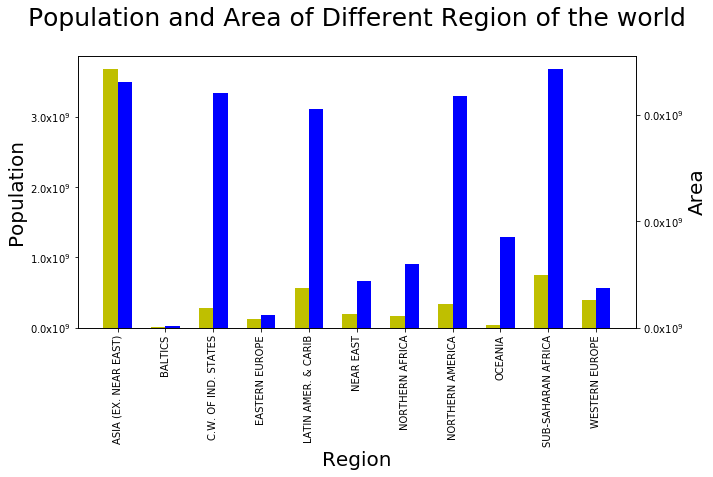

In [6]:
#一起研究'Population'和'Area (sq. mi.)'

N = len(df1)
y1 = df1['Population']
y2 = df1['Area (sq. mi.)']
index = np.arange(N)

def formatnum(x, pos):
    return '$%.1f$x$10^{9}$' % (x/1000000000)


# def formatnum(x, pos):
#     return '$%.1f$x$10^{7}$' % (x/10000000)

fig, ax1 = plt.subplots(1,1,figsize=(10,5))
ax2 = ax1.twinx()


bar_width = 0.3
ax1.bar(index -  bar_width/2 , y1, bar_width , color='y')
ax2.bar(index +  bar_width/2 , y2, bar_width , color='b')

ax1.set_title('Population and Area of Different Region of the world',fontsize=25,pad=30)
ax1.set_xlabel('Region',fontsize=20)
ax1.set_ylabel('Population',fontsize=20)
ax2.set_ylabel('Area',fontsize=20)


plt.xticks(np.arange(N))
ax1.set_xticklabels(df1.index,rotation=90 )


formatter = FuncFormatter(formatnum)

ax1.yaxis.set_major_locator(formatter)
ax1.yaxis.set_major_formatter(formatter)
ax1.set_yticks(np.arange(0,4000000000,step=1000000000))


formatter = FuncFormatter(formatnum)

ax2.yaxis.set_major_locator(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_yticks(np.arange(0,30000000,step=10000000))

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

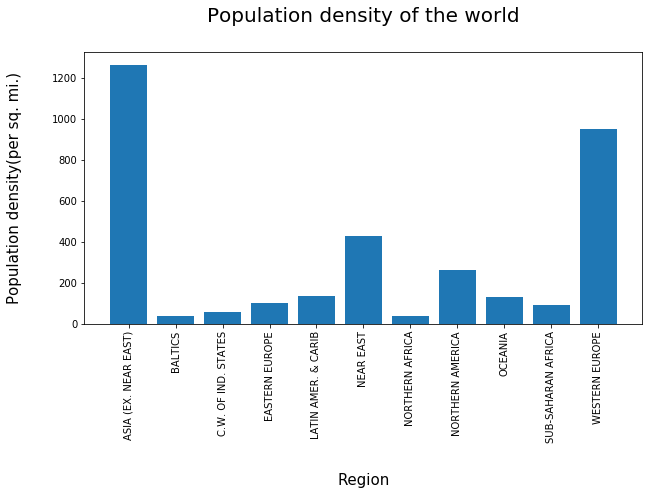

In [7]:
#基于上面的结果，继续研究人口密度
plt.subplots(1,1,figsize=(10,5))
plt.bar(x=df2['Pop. Density (per sq. mi.)'].index,height=df2['Pop. Density (per sq. mi.)'])
plt.title('Population density of the world',pad=30,fontsize=20)
plt.xlabel('Region',labelpad=30,fontsize=15)
plt.ylabel('Population density(per sq. mi.)',labelpad=30,fontsize=15)
plt.xticks(rotation=90)

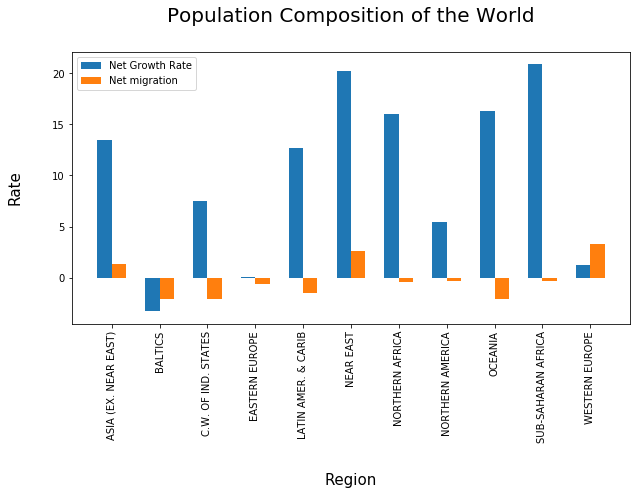

In [8]:
#人口组成成分，人口净增长率和迁移率的关系
df2['Net Growth Rate']=df2['Birthrate']-df2['Deathrate']

bar_width=0.3
N = len(df1)
index = np.arange(N)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.bar(index -  bar_width/2, df2['Net Growth Rate'],bar_width)
ax.bar(index +  bar_width/2, df2['Net migration'],bar_width)
plt.title('Population Composition of the World',pad=30,fontsize=20)
plt.xlabel('Region',labelpad=30,fontsize=15)
plt.ylabel('Rate',labelpad=30,fontsize=15)
plt.xticks(np.arange(N),df2['Net Growth Rate'].index,rotation=90)
ax.legend(('Net Growth Rate','Net migration'))

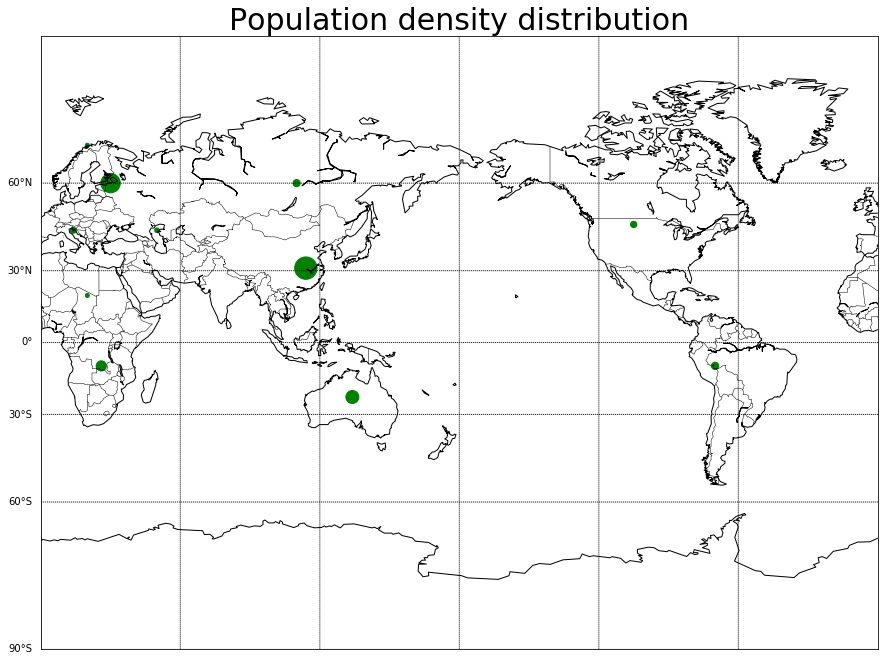

In [9]:
#在地图上显示人口密度分布图

fig=plt.figure(figsize=(15,15))

map = Basemap(projection='mill',lon_0=180)

map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[1,0,0,0])
#map.drawmapboundary(fill_color='aqua')
#map.fillcontinents(color='coral',lake_color='aqua')


#lons=dict({'ASIA (EX. NEAR EAST)':22.,'C.W. OF IND. STATES':21.,'NEAR EAST':31.,'NORTHERN AMERICA':47., 'LATIN AMER. & CARIB':-1.,'OCEANIA':-23.,
#	 		 'NORTHERN AFRICA':23.,'SUB-SAHARAN AFRICA':-8.,'EASTERN EUROPE':63.,'WESTERN EUROPE':50.,'BALTICS':58.})
#lats=dict({'ASIA (EX. NEAR EAST)':55.,'C.W. OF IND. STATES':21.,'NEAR EAST':114.,'NORTHERN AMERICA':-76.,'LATIN AMER. & CARIB':-116.,'OCEANIA':134.,
#	 		 'NORTHERN AFRICA':11.,'SUB-SAHARAN AFRICA':26.,'EASTERN EUROPE':88.,'WESTERN EUROPE':14.,'BALTICS':20.})

#要显示的散点的经纬度
lats=np.array([31.,70.,45.,47.,-10.,-23.,20.,-10.,60.,45.,60.])
lons=np.array([114.,20.,50.,255.,290.,134.,20.,26.,110.,14.,30.])

#要显示的散点的经纬度
size=df2['Pop. Density (per sq. mi.)']/df2['Pop. Density (per sq. mi.)'].max()
size=size.values

x, y = map(lons,lats)
map.scatter(x,y,s=size*500,marker='o',color='g')

plt.title('Population density distribution',fontsize=30)
plt.show()

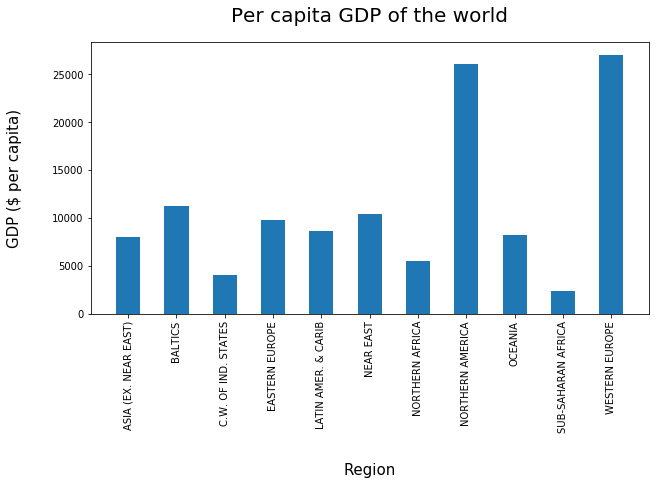

In [10]:
#人均GDP对比
plt.subplots(1,1,figsize=(10,5))
plt.bar(x=df2['GDP ($ per capita)'].index,height=df2['GDP ($ per capita)'],width = 0.5)
plt.title('Per capita GDP of the world',pad=20,fontsize=20)
plt.xlabel('Region',labelpad=30,fontsize=15)
plt.ylabel('GDP ($ per capita)',labelpad=30,fontsize=15)
plt.xticks(rotation=90)
plt.show()

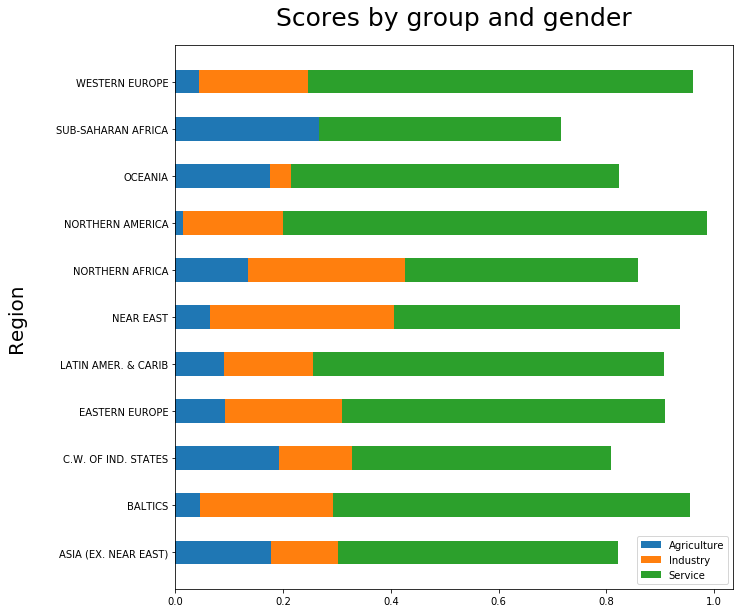

In [13]:
#产业分布比例
plt.subplots(1,1,figsize=(10,10))
ind = df2.index
width=0.5
p1 = plt.barh(ind, df2['Agriculture'] ,width)
p2 = plt.barh(ind, df2['Industry'],width,left=df2['Agriculture'])
p3 = plt.barh(ind, df2['Service'],width,left=df2['Industry'])

plt.title('Scores by group and gender',pad=20,fontsize=25)
plt.ylabel('Region',labelpad=30,fontsize=20)
#plt.yticks(rotation=90)
plt.legend((p1[0], p2[0],p3[0]), ('Agriculture', 'Industry' , 'Service'))

plt.show()

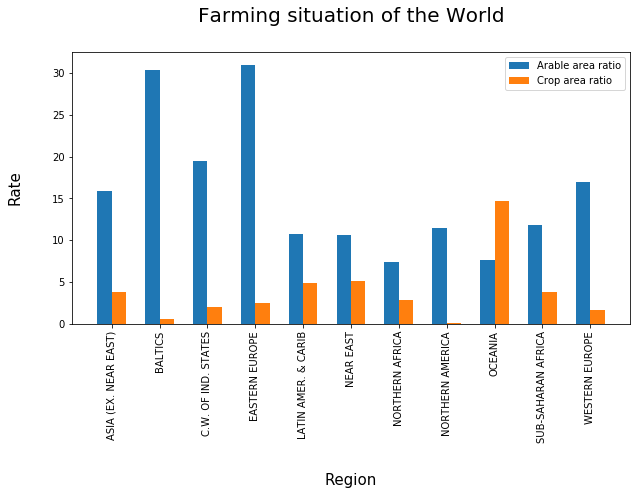

In [15]:
#可耕面积和农作物比例
bar_width=0.3
N = len(df2)
index = np.arange(N)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.bar(index -  bar_width/2, df2['Arable (%)'],bar_width)
ax.bar(index +  bar_width/2, df2['Crops (%)'],bar_width)
plt.title('Farming situation of the World',pad=30,fontsize=20)
plt.xlabel('Region',labelpad=30,fontsize=15)
plt.ylabel('Rate',labelpad=30,fontsize=15)
plt.xticks(np.arange(N),df2['Arable (%)'].index,rotation=90)
ax.legend(('Arable area ratio','Crop area ratio'))
plt.show()